In [7]:
import numpy as np

fpath = "D:\AWA\phase_space_tomography_run2\Quadscan_data\\"

#load files into single dataset
vals = np.arange(-100,160,10)
vals[3] = -69
vals[-9] = 69
vals = np.delete(vals,[-2,-4,-6,-8,-10])

fnames = [f"{ele:+}.npy".replace("+", "p").replace("-", "n") for ele in
              vals]
fnames[10] = "0.npy"

all_data = []
n_images = 5
for name in fnames:
    all_data += [np.load(fpath + name)[:n_images]]

all_data = np.stack(all_data)

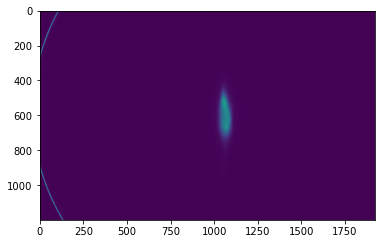

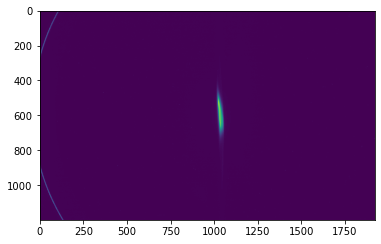

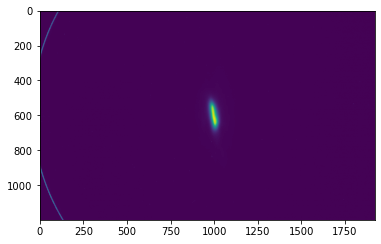

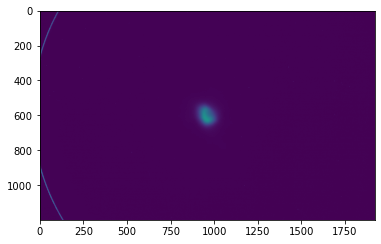

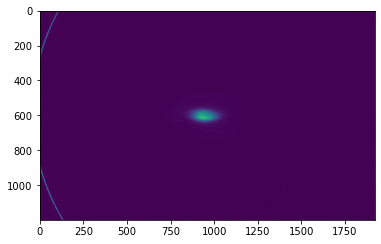

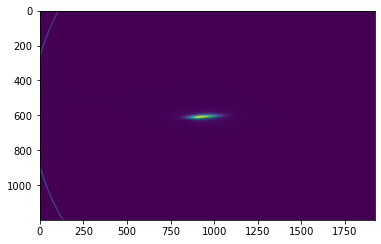

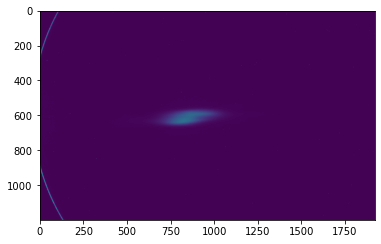

In [8]:
import matplotlib.pyplot as plt
for i in np.arange(0,21,3):
    plt.figure()
    plt.imshow(all_data[i,0])

In [9]:
total_im = np.sum(all_data, axis=0).sum(axis=0)
total_im = total_im - np.min(total_im)

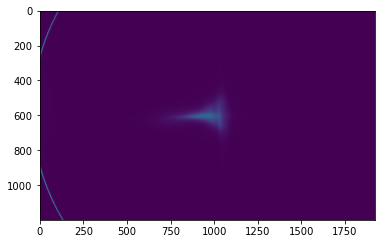

In [10]:
plt.imshow(total_im)

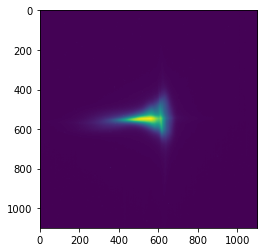

In [11]:
# cropping
# screen stats Circle(xy=(1144.55, 578.731), radius=1189.01)
# zero quad strength beam Circle(xy=(967.346, 606.512), radius=67.8045)
c = [606,966]
s = [550,550]
x_slice = slice(c[0] - s[0], c[0] + s[0])
y_slice = slice(c[1] - s[1], c[1] + s[1])
all_data_cropped = all_data[:,:,x_slice, y_slice]
total_im_cropped = np.sum(all_data_cropped, axis=0).sum(axis=0)
plt.imshow(total_im_cropped)

(184, 184)


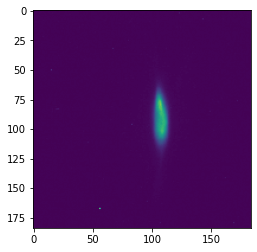

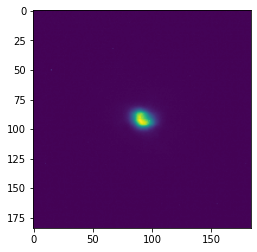

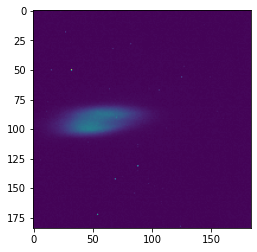

In [12]:
## downsample by a given factor
downsample_factor = 6
all_data_final = all_data_cropped[:,:,::downsample_factor, ::downsample_factor]
plt.figure()
plt.imshow(all_data_final[0,0])
plt.figure()
plt.imshow(all_data_final[10,0])
plt.figure()
plt.imshow(all_data_final[20,0])

print(all_data_final[20,0].shape)
# Count to T/m
count_tm = vals * 8.93e-3

# T/m to m^-2
beta1 = 1.0
Ebeam1 = 63e6
kvals = -count_tm * (1/((beta1 * Ebeam1*1e-9) / 0.299))


np.save("quad_strength.npy", kvals)
np.save("image_data.npy", all_data_final)